# Working With Scientific Notation

The `exponent_format` parameter in the `theme(...)` function can be used to configure the way "exponent notation" looks like on plot.

Available values:

- `'e'` for "e" notation (e.g. 1e+6);
- `'pow_full'` for "power" notation (e.g. $1 \cdot 10^6$). This will enable superscript formatting for the exponent;
- `'pow'` works as `'pow_full'` but will shorten powers of 10 (e.g. $10^6$ instead of $1 \cdot 10^6$).

The "exponent format" is automatically applied to each value formatted in scientific notation, regardless whether the format is user-defined or chosen automatically based on the data. This format affects every part of a plot, including geoms, scales, labels, and tooltips.

> **Note**
>
> Superscript is not supported when exporting to PNG/PDF.
>
> The `CairoSVG` library (which is under the hood of our `ggsave()` function) does not handre `tspan` element properly end breaks superscript notation when transforming SVG to PNG/PDF.
>
> More details: https://github.com/Kozea/CairoSVG/issues/317

In [1]:
import pandas as pd

from lets_plot import *


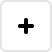
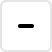
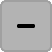
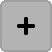
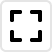
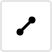
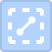
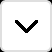
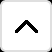
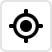
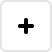
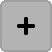
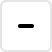
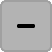
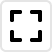
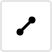
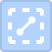
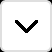
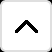
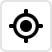

In [2]:
LetsPlot.setup_html()

## Exponent Format Customization

In [3]:
def hourglass_plot(title, number_format=None):
    dmin, dmax = -7, 6
    values = [10**d for d in range(dmin, dmax + 1)]
    return ggplot() + \
        geom_text(aes(y=values, label=values), label_format=number_format, size=10) + \
        scale_y_continuous(limits=[10**(dmin - 1), 10**(dmax + 1)], trans='log10') + \
        ggtitle(title) + \
        theme_classic()

### Specify Format

By default, values in `geom_text()` and `geom_label()` are always shown in standard notation. 

Thus by default, the `'pow'`/`'pow_full'` in `theme()` doesn't affect numbers in `geom_text()` and `geom_label()` unless you specify a scientific notation formatting explicitly (`"e"` or `"g"`) via the `label_format` parameter.

In [4]:
gggrid([
    hourglass_plot("Default format"),
    hourglass_plot("format='~g'", "~g")
])

### Switch Exponent Format to Power Degree

In [5]:
gggrid([
    hourglass_plot("Default exponent_format", "~g"),
    hourglass_plot("exponent_format='pow'", "~g") + theme(exponent_format='pow'),
    hourglass_plot("exponent_format='pow_full'", "~g") + theme(exponent_format='pow_full')
])

### Specify the Limits From Which the Scientific Notation Used

In [6]:
gggrid([
    hourglass_plot("Default limits", "~g") + theme(exponent_format='pow'),
    hourglass_plot("Scientific notation for \( x \leq 10^{-3} \) and \( x \geq 10^3 \)", "~g") + \
        theme(exponent_format=('pow', -3, 3))
])

## Chemical Elements Demo

In [7]:
amu_coeff_ng = 1.6605402 * 10**(-15)

In [8]:
df = pd.read_csv("https://github.com/JetBrains/lets-plot-docs/raw/refs/heads/master/data/chemical_elements.csv", \
                 encoding_errors='backslashreplace')
df = df[["Element", "Symbol", "Type", "Atomic Weight", "Atomic Radius"]]
df.columns = ["Name", "Symbol", "Type", "Weight (ng)", "Radius"]
df["Weight (ng)"] *= amu_coeff_ng
print(df.shape)
df.head()

(118, 5)


,Name,Symbol,Type,Weight (ng),Radius
0,Hydrogen,H,Nonmetal,1.673725e-15,0.79
1,Helium,He,Noble Gas,6.646482e-15,0.49
2,Lithium,Li,Alkali Metal,1.152581e-14,2.10
3,Beryllium,Be,Alkaline Earth Metal,1.496509e-14,1.40
4,Boron,B,Metalloid,1.795210e-14,1.20


In [9]:
ggplot(df) + \
    geom_label(aes("Weight (ng)", "Radius", label="Symbol", fill="Type"), \
               alpha=.75, fontface='bold') + \
    scale_x_continuous(limits=[0, 4*10**(-13)], \
                       breaks=[(i / 2.0)*10**(-13) for i in range(9)], \
                       format="~g") + \
    scale_fill_brewer(guide=guide_legend(ncol=2)) + \
    ggsize(1000, 500) + \
    theme(exponent_format='pow', \
          axis_text_x=element_text(size=16, face='bold'), \
          legend_position=(.91, .89), legend_key_size=12, legend_text=element_text(size=9))